In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/video_games_sales/vgsales.csv")

In [4]:
# Перевірка стовпців
print("\nСписок стовпців:")
print(data.columns)



Список стовпців:
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [5]:
# Розмір таблиці
print('\n Розмір таблиці')
print(data.shape)


 Розмір таблиці
(16598, 11)


In [6]:
# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())


Кількість пропущених значень у кожному стовпці:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [5]:
# Видалення пропущених значень
data.dropna(inplace=True)
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [6]:
# Типи змінних
print("\nТипи даних у стовпцях:")
print(data.dtypes)


Типи даних у стовпцях:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

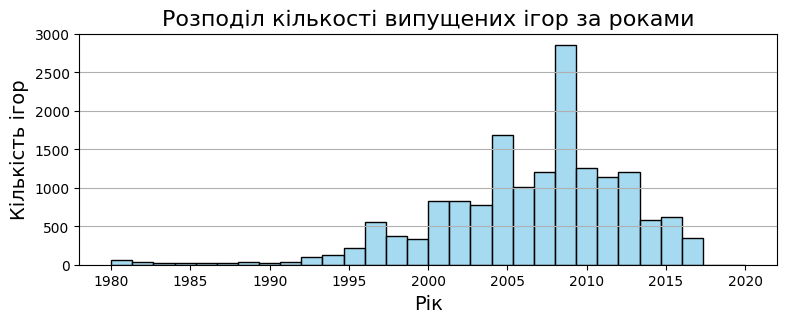

In [9]:
# Побудова графіка
plt.figure(figsize=(9, 3))
sns.histplot(data['Year'], bins=30, color='skyblue')
plt.title('Розподіл кількості випущених ігор за роками', fontsize=16)
plt.xlabel('Рік', fontsize=14)
plt.ylabel('Кількість ігор', fontsize=14)
plt.grid(axis='y')
plt.show()

In [10]:
platform_realeses = data['Platform'].value_counts()
platform_realeses.head()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: count, dtype: int64

In [11]:
publisher = data['Publisher'].value_counts()
publisher.head()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64

In [15]:
# Фільтруємо дані для ігор Nintendo
nintendo_games = data[data['Publisher'] == 'Nintendo']
nintendo_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
# Розрахунок медіанних продажів для кожного регіону
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
median_sales = {region: nintendo_games[region].median() for region in regions}
median_sales

{'NA_Sales': 0.375, 'EU_Sales': 0.12, 'JP_Sales': 0.28, 'Other_Sales': 0.03}

In [19]:
# Визначення регіону з найбільшим медіанним продажем
max_region = max(median_sales, key=median_sales.get)
max_region

'NA_Sales'

In [ ]:
# Розрахунок статистик за жанрами
jp_sales_by_genre = nintendo_games.groupby('Genre')['JP_Sales'].agg(
    median='median', 
    mean='mean', 
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

# Вивід результатів
print("Описові статистики обсягів продажів ігор Nintendo в Японії за жанрами:")
print(jp_sales_by_genre)

Описові статистики обсягів продажів ігор Nintendo в Японії за жанрами:
           Genre  median      mean      q1      q3     iqr
0         Action   0.170  0.373846  0.0800  0.4600  0.3800
1      Adventure   0.090  0.257429  0.0300  0.2300  0.2000
2       Fighting   0.500  0.830000  0.1325  1.3650  1.2325
3           Misc   0.250  0.552500  0.0500  0.7300  0.6800
4       Platform   0.540  0.922162  0.2250  1.0800  0.8550
5         Puzzle   0.255  0.501216  0.0800  0.6025  0.5225
6         Racing   0.340  0.789730  0.1000  0.8900  0.7900
7   Role-Playing   0.360  0.970952  0.1600  0.7400  0.5800
8        Shooter   0.130  0.251250  0.0775  0.2825  0.2050
9     Simulation   0.390  0.844643  0.0725  0.9675  0.8950
10        Sports   0.250  0.652182  0.0600  0.7150  0.6550
11      Strategy   0.190  0.337419  0.0600  0.4450  0.3850


In [22]:
# Фільтруємо дані для ігор Nintendo і зазначених жанрів
filtered_genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
nintendo_filtered = data[(data['Publisher'] == 'Nintendo') & (data['Genre'].isin(filtered_genres))]

In [23]:
# Групування даних за роками та жанрами, обчислення сумарних продажів
sales_by_year_genre = nintendo_filtered.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

Рік із найбільшими продажами ігор жанру Sports: 2006
Обсяг продажів: 84.61999999999999 млн копій


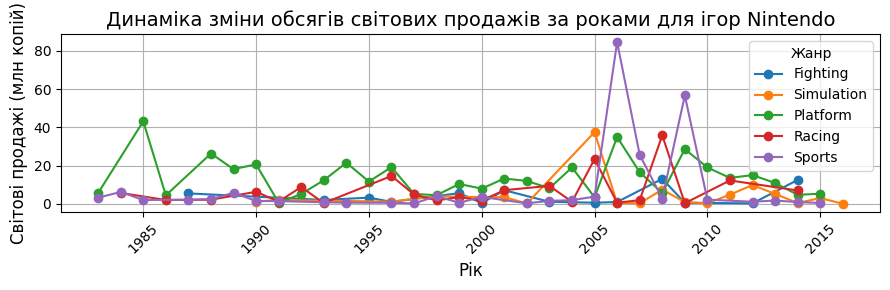

In [25]:
# Побудова графіка
plt.figure(figsize=(9, 3))
for genre in filtered_genres:
    genre_sales = sales_by_year_genre[sales_by_year_genre['Genre'] == genre]
    plt.plot(genre_sales['Year'], genre_sales['Global_Sales'], label=genre, marker='o')

# Налаштування графіка
plt.title('Динаміка зміни обсягів світових продажів за роками для ігор Nintendo', fontsize=14)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Світові продажі (млн копій)', fontsize=12)
plt.legend(title='Жанр')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Визначення років із найбільшими продажами для жанру Sports
sports_sales = sales_by_year_genre[sales_by_year_genre['Genre'] == 'Sports']
max_sports_year = sports_sales.loc[sports_sales['Global_Sales'].idxmax()]

print(f"Рік із найбільшими продажами ігор жанру Sports: {int(max_sports_year['Year'])}")
print(f"Обсяг продажів: {max_sports_year['Global_Sales']} млн копій")

# Відображення графіка
plt.show()